# Task 1

For task 1, it is required to find the best path given a grid with random time weights between 0 and 9. To solve the task, three different algorithms are impemented:
- **random search**: algorithm to obtain the solution with random steps on the grid
- **simple search**: basic algorithm for finding a faster path by evaluating the best movement based on adjacent cells
- **Dijsktra search**: algorithm based on Dijkstra's famous algorithm for finding the shortest distance between two nodes in a graph


In [1]:
import sys
sys.path.insert(0, '/Users/laerte/MSc AI/Projects/pam_ai/src')
import matplotlib.pyplot as plt
import numpy as np

from Task_1.agent import GameAgent
from Task_1.grid import GameGrid
from Task_1.simple_search import SimpleSearch
from Task_1.Dijkstra_search_v2 import DijkstraSearch
from Task_1.random_search import RandomSearch

### Initialise the grid

The grid is generated parametrically via the GameGrid class. This class, taking the vertical and horizontal dimensions as input, generates a grid filled with random numbers between 0 and 9.

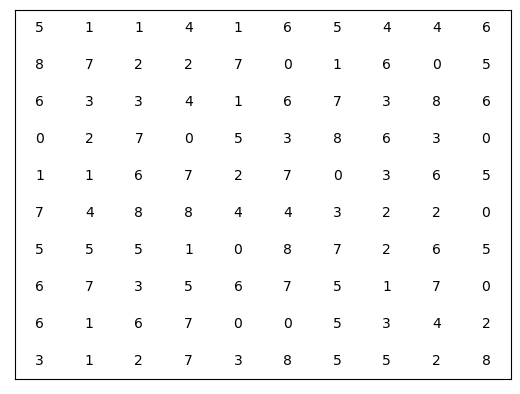

In [2]:
# The grid is initiated and printed using the GameGrid class. 
# It requires as argumentes the vertical and horizontal dimensions of the grid
grid = GameGrid(10,10) 
grid.generate_grid()
grid.print_grid();


### Random Search

Random Search score: 4180


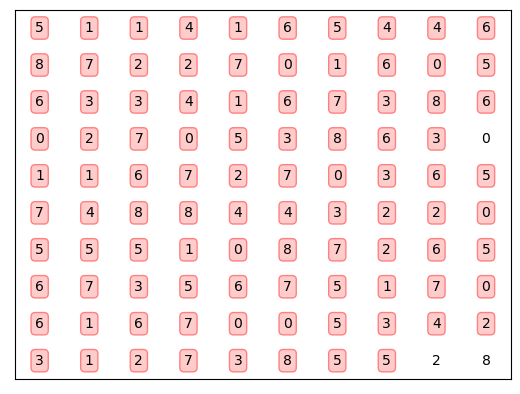

In [3]:
# The object GameAgent is employed to store agent position and the overall time of game movements (i.e., timer)
# It is initated given the initial position of the agent, i.e., (0,0) to make it start at left-upper corner
ag_random = GameAgent(0,0)

# Initialise the RandomSearch class, given the agent, the grid and the maximum number of steps
randSearch = RandomSearch(ag_random, grid, 1000)
randSearch.compute_path()

grid.print_path(randSearch.visited_set) # print the grid and the path followed
print("Random Search score: {}".format(ag_random.timer))

### Simple Search

Simple Search score: 63


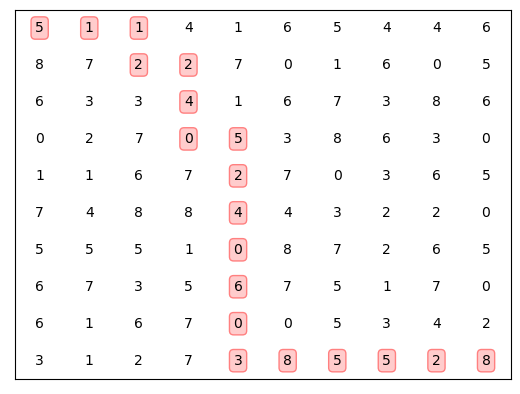

In [4]:
# Initialise the agent for Simple Search
ag_simple = GameAgent(0,0)

# Initialise the SimpleSearch class, given the agent and the grid 
simpSearch = SimpleSearch(ag_simple,grid)
simpSearch.compute_path()

grid.print_path(simpSearch.visited_set) # print the grid and the path followed
print("Simple Search score: {}".format(ag_simple.timer))

### Dijkstra Search


Simple Search score: 51.0


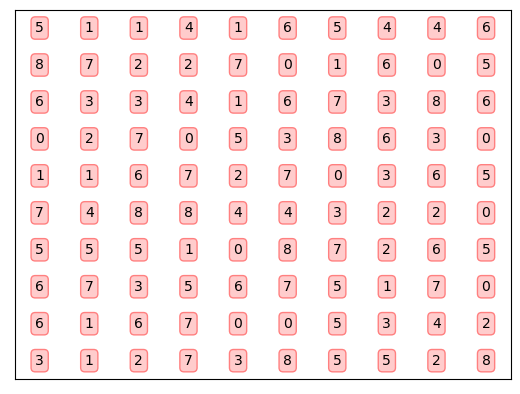

In [5]:
# Initialise the agent for Dijkstra Search
ag_dijkstra = GameAgent(0,0)

# Initialise the DijkstraSearch class, given the agent and the grid 
dijSearch = DijkstraSearch(ag_dijkstra, grid)
dijSearch.compute_path()

grid.print_path(dijSearch.visited_set) # print the grid and the path followed
print("Dijkstra Search score: {}".format(ag_dijkstra.timer))

### First results

An initial comparison of the algorithms can be made by evaluating:
- the algorithm score
- the time required to obtain a solution

#### Score

In [51]:
print("Random Search score: {}".format(ag_random.timer))
print("Simple Search score: {}".format(ag_simple.timer))
print("Dijkstra Search score: {}".format(ag_dijkstra.timer))

Random Search score: 3527
Simple Search score: 49
Dijkstra Search score: 49


#### Execution Time

In order to allow an objective measurement of the efficiency of the algorithm used, the execution time was calculated during the execution of the compute_path method. This time, saved as execution_time for each algorithm class, is used for a comparison of the speed difference in the search for the solution. 

In [52]:
print("Random Search execution time: {time:.3f} ms".format(time = ag_random.execution_time))
print("Simple Search: {time:.3f} ms".format(time = ag_simple.execution_time))
print("Dij Search: {time:.3f} ms".format(time = ag_dijkstra.execution_time))

Random Search execution time: 1.874 ms
Simple Search: 0.060 ms
Dij Search: 0.243 ms


As a first conclusion, it can be observed that the worst score is obtained with the random search. The comparison with the simple search and the Dijkstra search, on the other hand, presents more variable results. In some situations, the score is very similar, in others, the Dijkstra search score is much better than the simple search. A more accurate analysis on the sensitivity of these values is postponed to a later section of the notebook.

As far as calculation times are concerned, the fastest algorithm turns out to be the simple search. The Dijkstra search has a longer execution time, but its score tends to be better. With regard to the execution time of the random search, a great dependence on the size of the grid is expected. For a small grid, the results are comparable to the Dijkstra search time, but for larger grids, an extremely longer execution time is expected.

### Performance analysis

The performance of the algorithms is evaluated in terms of time and steps required to get to the solutions. Moreover, the quality of the result is also assessed comparing the sum of the time required to reach the final cell (i.e., the bottom right cell)

In [87]:
square_dimesions = np.array([(10,10),(20,20),(30,30),(50,50),(75,75),(100,100),(150,150),(200,200),(300,300),(400,400),(500,500),(1000,1000)])
n_executions = 50

#x_plot = square_dimesions.prod(axis=1) 
x_plot = [str(square_dimesions[x][0]) for x in range(square_dimesions.shape[0])]

random_search_execution_time = np.zeros(square_dimesions.shape[0])
simple_search_execution_time = np.zeros(square_dimesions.shape[0])
dijkstra_search_execution_time = np.zeros(square_dimesions.shape[0])

score_simple_dijkstra = np.zeros(square_dimesions.shape[0])
time_simple_dijkstra = np.zeros(square_dimesions.shape[0])

In [88]:
ag_random = GameAgent(0,0)
ag_simple = GameAgent(0,0)
ag_dijsktra = GameAgent(0,0)

for index in range(square_dimesions.shape[0]):

    temp_time_random = np.zeros(n_executions)
    temp_time_simple = np.zeros(n_executions)
    temp_time_dijkstra = np.zeros(n_executions)

    temp_score_simple = np.zeros(n_executions)
    temp_score_dijkstra = np.zeros(n_executions)

    for i in range(n_executions):


        # Generate the grid with given dimensions
        grid = GameGrid(square_dimesions[index][0],square_dimesions[index][1])   # type: ignore
        grid.generate_grid()

        # Reset the agent
        ag_random.reset()
        ag_simple.reset()
        ag_dijkstra.reset()

        #RandomSearch(ag_random,grid,100000).compute_path()
        SimpleSearch(ag_simple,grid).compute_path()
        DijkstraSearch(ag_dijkstra, grid).compute_path()

        #print(ag_random.path_found)

        temp_time_random[i] = ag_random.execution_time
        temp_time_simple[i] = ag_simple.execution_time
        temp_time_dijkstra[i] = ag_dijkstra.execution_time

        temp_score_simple[i] = ag_simple.timer
        temp_score_dijkstra[i] = ag_dijkstra.timer


    random_search_execution_time[index] = temp_time_random.mean()
    simple_search_execution_time[index] = temp_time_simple.mean()
    dijkstra_search_execution_time[index] = temp_time_dijkstra.mean()

    score_simple_dijkstra[index] = temp_score_simple.mean() / temp_score_dijkstra.mean()
    time_simple_dijkstra[index] = temp_time_simple.mean() / temp_time_dijkstra.mean()
    #dijkstra_search_score[index] = ag_dijkstra.timer


    



Text(0, 0.5, 'Execution time [ms]')

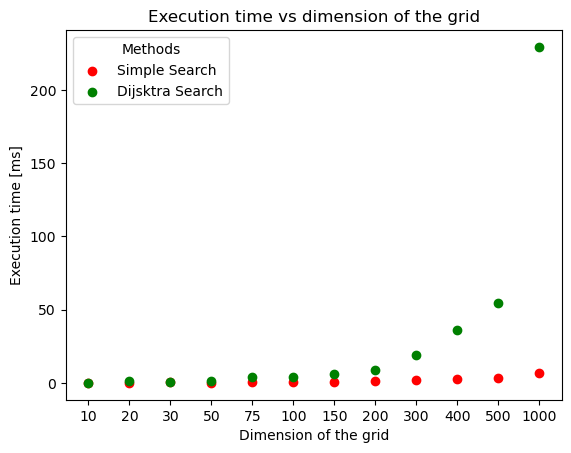

In [89]:
fig, ax = plt.subplots()
#plt.scatter(x_plot,random_search_execution_time,c = "b",label="Random Search")
plt.scatter(x_plot,simple_search_execution_time, c="r",label="Simple Search")
plt.scatter(x_plot,dijkstra_search_execution_time,c = "g",label="Dijsktra Search")

plt.legend(title="Methods")
plt.title("Execution time vs dimension of the grid")
ax.set_xlabel("Dimension of the grid")
ax.set_ylabel("Execution time [ms]")
#plt.grid()


Text(0, 0.5, 'Execution time')

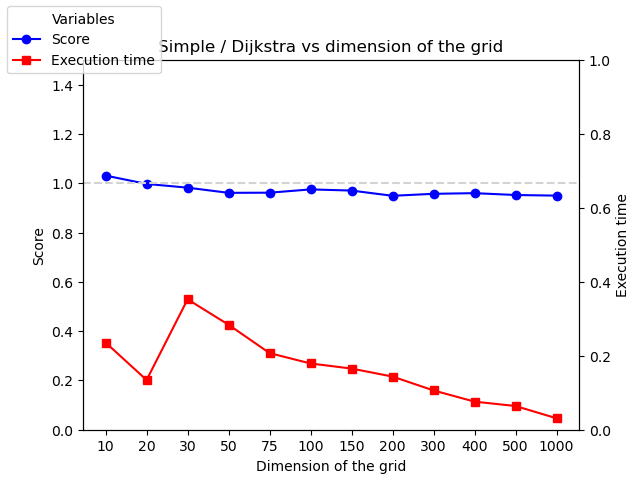

In [96]:
fig, ax = plt.subplots()
plt.plot(x_plot,score_simple_dijkstra,"o-",c = "b",label="Score")
ax2 = ax.twinx()
ax2.plot(x_plot,time_simple_dijkstra,"s-",c = "r",label="Execution time")
fig.legend(title="Variables",loc="upper left")
ax2.set_ylim(0,1)
ax.set_ylim(0,1.5)
ax.axhline(1, c = "lightgrey", linestyle="--")
plt.title("Simple / Dijkstra vs dimension of the grid")
ax.set_xlabel("Dimension of the grid")
ax.set_ylabel("Score")
ax2.set_ylabel("Execution time")
